# LINEAR REGRESSION MODEL for predicting Customer Loyalty Score using TensorFlow

_Data is from https://www.kaggle.com/datasets/hanaksoy/customer-purchasing-behaviors/data_

__About Dataset__

customer_id: Unique ID of the customer.<br>
age: The age of the customer.<br>
annual_income: The customer's annual income (in USD).<br>
purchase_amount: The total amount of purchases made by the customer (in USD).<br>
purchase_frequency: Frequency of customer purchases (number of times per year).<br>
region: The region where the customer lives (North, South, East, West).<br>
loyalty_score: Customer's loyalty score (a value between 0-100).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

## 1. Load and prepare data

Choose features: age, annual income, purchase amount, purchase frequency<br>
Choose target: loyalty score<br>

In [2]:
# Load data
raw_dataset = pd.read_csv('Customer Purchasing Behaviors.csv')

# Duplicate data
dataset = raw_dataset.copy()

# Choose features and target
features = ['age', 'annual_income', 'purchase_amount', 'purchase_frequency']
target = ['loyalty_score']

# Select relevant columns
dataset = dataset[ features + target ]

# Handle missing values
dataset = dataset.dropna()
print(dataset)

     age  annual_income  purchase_amount  purchase_frequency  loyalty_score
0     39          57000              440                  21            7.0
1     34          55000              350                  18            7.0
2     45          65000              500                  22            8.0
3     22          30000              150                  10            3.0
4     29          47000              220                  13            4.8
..   ...            ...              ...                 ...            ...
233   40          60000              450                  20            7.2
234   38          59000              430                  20            6.9
235   54          74000              630                  27            9.4
236   32          52000              360                  18            5.8
237   31          51000              340                  17            5.6

[238 rows x 5 columns]


### Split data for training and testing

Choose 90-10 train-test data split.

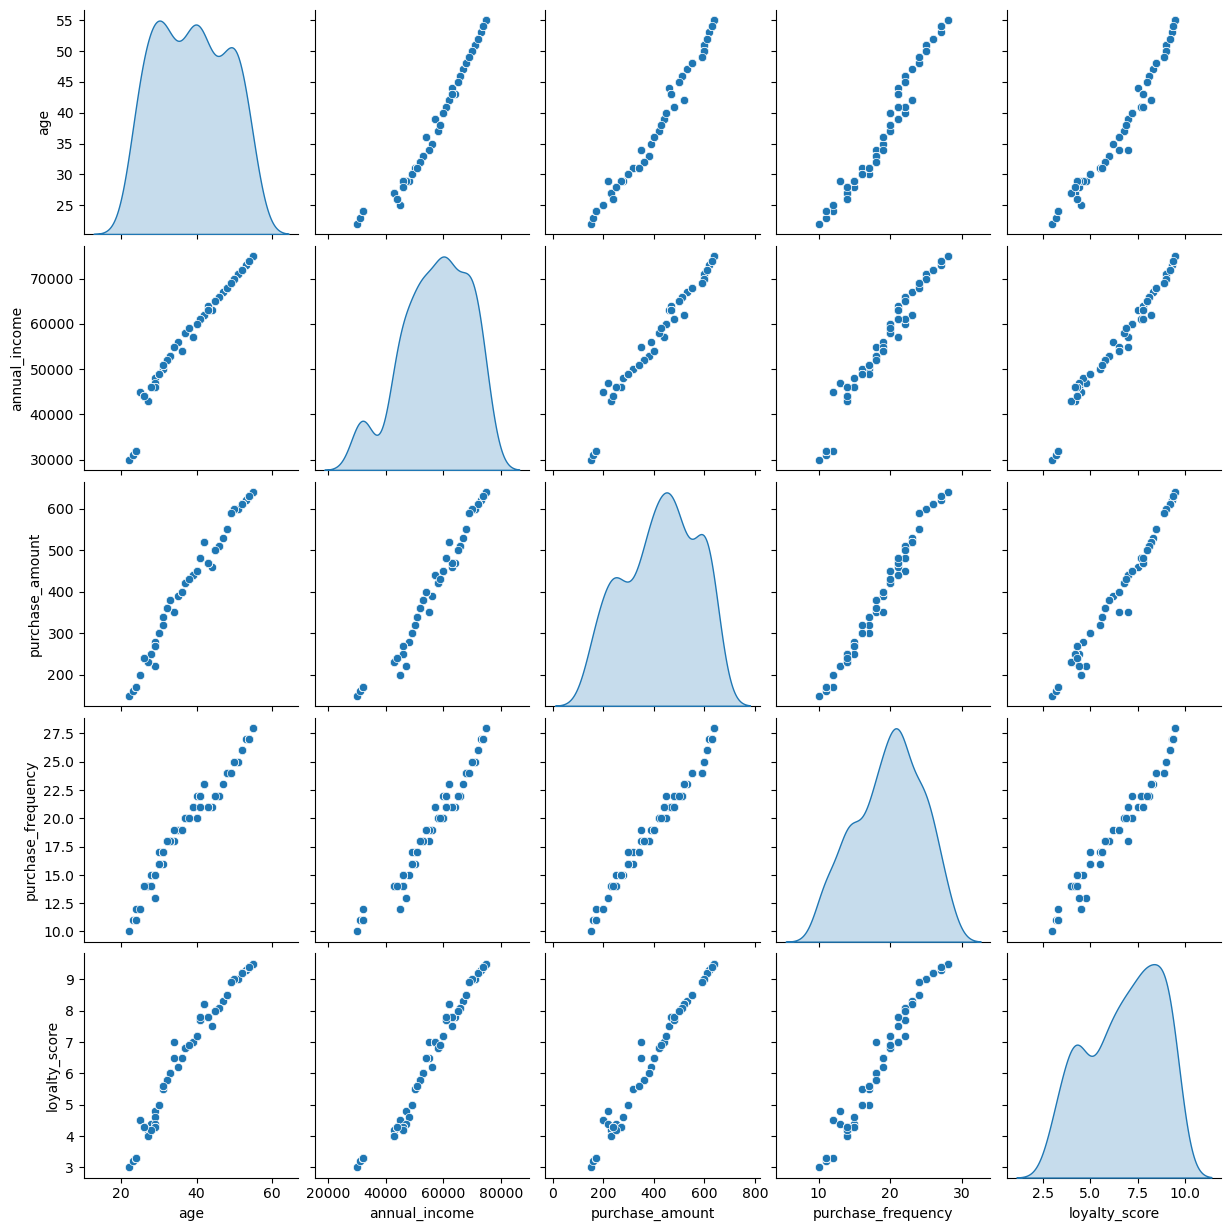

In [3]:
train_dataset = dataset.sample(frac=0.9, random_state=42)
test_dataset = dataset.drop(train_dataset.index)

sns.pairplot(dataset[features+target], diag_kind='kde')

### Split features from target

In [4]:
train_dataset.describe().transpose()

x_train = train_dataset.copy()
x_test  = test_dataset.copy()

y_train = x_train.pop(target[0])
y_test  = x_test.pop(target[0])

print(f"Shapes:\nx_train: {x_train.shape}\nx_test:  {x_test.shape}\ny_train: {y_train.shape}\ny_test:  {y_test.shape}\n")

print(x_train)

Shapes:
x_train: (214, 4)
x_test:  (24, 4)
y_train: (214,)
y_test:  (24,)

     age  annual_income  purchase_amount  purchase_frequency
115   54          74000              630                  27
15    23          31000              160                  11
212   51          71000              600                  25
126   50          70000              600                  25
6     36          54000              400                  19
..   ...            ...              ...                 ...
187   24          32000              170                  11
191   37          58000              420                  20
129   30          49000              300                  16
37    30          49000              300                  17
157   24          32000              170                  11

[214 rows x 4 columns]


### Prepare data normalizer

In [6]:
train_dataset.describe().transpose()[['mean', 'std']]

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(x_train))

## 2. Create and train the model

In [7]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mse', metrics=['mae'])

In [8]:
history = model.fit(x_train, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 52.7989 - mae: 6.9886 - val_loss: 46.0961 - val_mae: 6.4444
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 44.9103 - mae: 6.4081 - val_loss: 41.5729 - val_mae: 6.0319
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 43.0357 - mae: 6.2263 - val_loss: 37.6157 - val_mae: 5.6277
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 37.3395 - mae: 5.7063 - val_loss: 34.1355 - val_mae: 5.2242
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 34.6221 - mae: 5.4245 - val_loss: 30.8988 - val_mae: 4.9870
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 29.8885 - mae: 5.0058 - val_loss: 27.6925 - val_mae: 4.8433
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 27.3772 - mae: 4.8007 - val_loss: 24.5806 - val_mae: 4.6539
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 22.9216 - mae: 4.3438 - val_loss: 21.6356 - val_mae: 4.4062
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - los

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1162 - mae: 0.2634 - val_loss: 0.0760 - val_mae: 0.2314
Epoch 56/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1070 - mae: 0.2563 - val_loss: 0.0719 - val_mae: 0.2236
Epoch 57/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1015 - mae: 0.2516 - val_loss: 0.0700 - val_mae: 0.2212
Epoch 58/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1074 - mae: 0.2591 - val_loss: 0.0675 - val_mae: 0.2159
Epoch 59/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0908 - mae: 0.2424 - val_loss: 0.0653 - val_mae: 0.2139
Epoch 60/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0882 - mae: 0.2285 - val_loss: 0.0645 - val_mae: 0.2115
Epoch 61/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0958 - mae: 0.2407 - val_loss: 0.0657 - val_mae: 0.2134
Epoch 62/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0869 - mae: 0.2340 - val_loss: 0.0602 - val_mae: 0.2015
Epoch 63/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0792 - mae: 0.22

## 3. Evaluate the model

In [11]:
# Make predictions on the test set
predictions = model.predict(x_test)

# Calculate individual errors
errors = (y_test - predictions.flatten()) / y_test * 100

# Print the results
print(f"Target:   Prediction:  Error:    ")
for true, pred, error in zip(y_test, predictions.flatten(), errors):
    if error < 0: gap = "        "
    else: gap = "         "
    
    print(f"{true}       {pred:.2f}{gap}{error:.2f}%")
    
# Evaluate the model on test data
loss, mae = model.evaluate(x_test, y_test)
print(f"Test loss: {loss}, \nTest MAE: {mae}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Target:   Prediction:  Error:    
7.0       6.08         13.17%
8.9       8.77         1.42%
9.2       9.24        -0.43%
8.0       7.82         2.23%
6.8       7.16        -5.23%
9.2       9.24        -0.43%
5.6       5.56         0.69%
9.0       9.00        -0.03%
5.0       4.97         0.61%
8.1       7.88         2.70%
6.0       6.06        -1.08%
7.8       7.56         3.09%
5.8       5.89        -1.54%
6.0       6.06        -1.08%
7.0       7.10        -1.39%
9.5       9.78        -2.92%
6.0       6.06        -1.08%
9.5       9.78        -2.92%
8.5       8.50        -0.00%
8.0       7.82         2.23%
4.3       4.40        -2.39%
7.8       7.45         4.47%
6.0       6.06        -1.08%
5.6       5.56         0.69%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0620 - mae: 0.1609
Test loss: 0.06202578917145729, 
Test MAE: 0.1608947515487671


## Final Mean Absolute Error: 0.16%

Check for overfitting

In [14]:
# Make predictions on the test set
predictions = model.predict(x_test)

# Calculate individual errors
errors = (y_test - predictions.flatten()) / y_test * 100

# Checking MAE for the training data
loss, mae = model.evaluate(x_train, y_train)
print(f"Test loss: {loss}, \nTest MAE: {mae}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0276 - mae: 0.1234
Test loss: 0.02910037711262703, 
Test MAE: 0.12523436546325684


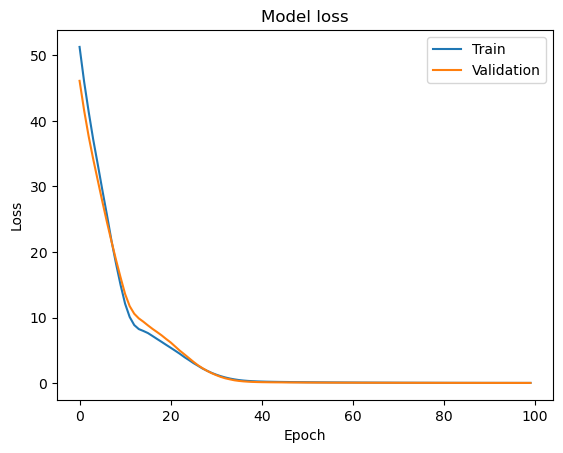

In [15]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Since the error of the training and testing data are roughly equal, and the model loss for both training and validation are congruent, __then the model generalizes well and does not overfit.__